<a href="https://colab.research.google.com/github/FelipePRosa/Data-Science-Projects/blob/main/Panorama_do_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do COVID-19
<left><img alt="Analisando Airbnb" width="40%" src="https://image.freepik.com/vetores-gratis/covid-19-projeto-de-surto-de-coronavirus-com-celula-de-virus-em-vista-microscopica-sobre-fundo-azul-modelo-de-ilustracao-no-tema-epidemico-de-sars-perigoso-para-banner-ou-panfleto-promocional_1314-2644.jpg"></left>

*by [Felipe Rosa](https://www.linkedin.com/in/felipe-pimentel-rosa-19975b10b/)*<br>
*Blog: [Medium](https://medium.com/@felipepimentelrosa)*

---
<br>

Recentemente, em dezembro de 2019, houve a transmissão de um novo coronavírus, identificado em Wuhan na China quee causou a COVID-19.

A COVID-19 é uma doença causada pelo coronavírus, denominado SARS-CoV-2. A família que este vírus pertence é comum a muitos animais, como gado, gatos e morcegos. Pelo fato do fator mutativo da doença ser muito alto (característica da família do vírus), isso faz com que a infecção pelo vírus possa acontecer mais de uma única vez no mesmo indivíduo, fator que torna a criação da vacina  complicada.

Por mais que sua taxa de mortalidade seja inferior as demais doenças, seu nível de contágil é extremamente alto, podendo alcançar milhões de pessoas em pouco tempo.

Seus sintomas são diversos e podem ser identificados em diferentes gravidades, entre eles estão: 
* Tosse
* Febre
* Coriza
* Dificuldade respiratória
* Dores
* Alteraçoes do Paladar

Observa-se que cerca de **80%** dos casos confirmados são assintomáticos de rápida recuperação. Cerca de **15%** dos contaminados têm quadro clínico considerado grave e precisam de oxigênio para suprir a dispineia. os outros **5%** estão classificados como infecções muito graves, sendo necessário a ventilação assistida e respiradores mecânicos em ambiente hospitalar. Portanto, é necessário cuidado e seriedade.

O contágio ocorre por meio de um agente infectado por meio de:
* Gotículas de saliva
* Espirro
* Tosse
* Outras secreções proveninte do contaminado.

<center><img alt="Colaboratory logo" width="50%" src="https://image.freepik.com/vetores-gratis/fundo-de-protecao-contra-coronavirus-com-mascara-facial_52683-48373.jpg"></center>

Para se manter seguro e saudável, os métodos recomendados para a prevenção do covid-19 são:
* Higienização das mãos e dos objetos pessoais
* Não tocar olhos, nariz e boca
* Manter distência mínima de 1m de pessoas em lugares públicos
* Utilização de máscara

Muitas informaçoes permanecem desconhecidas a respeito do novo coronavirus.

A fim de esclarecer alguns dados e elevar a conciência sobre a situação atual do mundo, este documento terá como finalidade analisar os dados públicos da doença.  

## Obtenção dos Dados

**Casos confirmados e Mortes:** Os dados que serão analisados são do [Center for Systems Science and Engineering (CSSE)](https://systems.jhu.edu/) da [Johns Hopkins University (JHU)](https://www.jhu.edu/) que coletam e publicam os dados no [Our World Data](https://ourworldindata.org/). A página de acesso aos dados do coronavirus pode ser acessada [aqui](https://ourworldindata.org/coronavirus-source-data) onde os dados são atualizados diariamente.
<br>
<br>
**Hospitalização e unidades de Cuidado Intensivo (ICU):** A fonte de dados foi o [European Centre for Disease Prevention and Control (ECDC)](https://www.ecdc.europa.eu/en/publications-data/download-data-hospital-and-icu-admission-rates-and-current-occupancy-covid-19) e tem uma escasses de valor global pela falta de dados divulgados.
<br>
<br>
**Teste para Covid e vacinação:** Os dados também foram coletados e divulgados pela equipe do [Our World Data](https://ourworldindata.org/).
<br>
<br>

*Nota: Os números representados pelas intituições que divulgam os dados podem não representar o valor no dia referido devido ao tempo de divulgação dos dados*

In [1]:
#@title *Código: importação das bibliotecas necessárias e dos dados de Covid fornecidos pelo Our World Data*
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# importar o dataset COVID-19 para um DataFrame
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
print('Data de registro mais atual do banco de dados: {}'.format(df.date.max()))

Data de registro mais atual do banco de dados: 2021-04-23


In [ ]:
# Verificação dos 5 primeiros valores
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
# Verificação dos 5 últimos valores
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
75752,ZWE,Africa,Zimbabwe,2021-03-14,36484.0,13.0,30.429,1503.0,2.0,2.571,2454.698,0.875,2.047,101.124,0.135,0.173,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36359.0,36359.0,NaN,0.0,588.0,0.24,0.24,NaN,40.0,48.15,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
75753,ZWE,Africa,Zimbabwe,2021-03-15,36504.0,20.0,30.714,1504.0,1.0,2.429,2456.044,1.346,2.067,101.191,0.067,0.163,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37660.0,37660.0,NaN,1301.0,306.0,0.25,0.25,NaN,21.0,48.15,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
75754,ZWE,Africa,Zimbabwe,2021-03-16,36535.0,31.0,30.571,1507.0,3.0,2.571,2458.130,2.086,2.057,101.393,0.202,0.173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39550.0,39550.0,NaN,1890.0,541.0,0.27,0.27,NaN,36.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
75755,ZWE,Africa,Zimbabwe,2021-03-17,36552.0,17.0,30.143,1508.0,1.0,2.714,2459.273,1.144,2.028,101.460,0.067,0.183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39607.0,39607.0,NaN,57.0,529.0,0.27,0.27,NaN,36.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
75756,ZWE,Africa,Zimbabwe,2021-03-18,36611.0,59.0,33.429,1509.0,1.0,2.429,2463.243,3.970,2.249,101.528,0.067,0.163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


##Análise da Base de Dados

Começaremos verificando a estrutura da base de dados que está sendo analisada.

Primeiro, a verificação da quantidade de dados e variáveis dispostas na tabela de informações:

In [ ]:
# Verificação da quantidade de dados e quantidade de informações por dado
print('Quantidade de dados coletados: {}'.format(df.shape[0]))
print('Quantidade de informações por dado: {}'.format(df.shape[1]))

Quantidade de dados coletados: 75757
Quantidade de informações por dado: 59


As 59 informações dispostas por dado, ou seja, as variáveis da tabela, são as seguintes:

In [ ]:
# Variáveis disponíveis nos dados recolhidos
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [ ]:
# Atribuir o dicionário a um dataframe
dictio = pd.read_excel('https://github.com/FelipePRosa/Data-Science-Projects/raw/main/Covid%2019%20dicion%C3%A1rio.xlsx')

**Descritivo das variáveis**

O significado de cada uma das variáveis e o remetente das informações serão amostrados abaixo:

In [ ]:
# Descrição das variáveis
#pd.set_option('display.max_colwidth',200)
pd.options.display.width=0
display(dictio)

,Variável,Obtenção do dado,Descritivo
0,iso_code,International Organization for Standardization,ISO 3166-1 alpha-3 – Código do País em 3 Letras
1,continent,Our World in Data,Continente da Localizaçao Geográfica
2,location,Our World in Data,Localização Geográfica
3,date,Our World in Data,Data da Observação
4,total_cases,COVID-19 Data Repository by the Center for Sys...,Casos confirmados de COVID-19
5,new_cases,COVID-19 Data Repository by the Center for Sys...,Novos casos de COVID-19
6,new_cases_smoothed,COVID-19 Data Repository by the Center for Sys...,Novos casos de COVID-19 (Normalizado 7 dias)
7,total_deaths,COVID-19 Data Repository by the Center for Sys...,Total de mortes atribuidas ao COVID-19
8,new_deaths,COVID-19 Data Repository by the Center for Sys...,Novas mortes atribuidas ao COVID-19
9,new_deaths_smoothed,COVID-19 Data Repository by the Center for Sys...,Novas mortes atribuidas ao COVID-19 (Normaliza...


Verificação dos tipos de cada uma das variáveis dispostas

In [ ]:
# Typos das informações dos dados coletados
df.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

A seguir, a quantidade de dados que estão ausentes na base de dados

In [ ]:
# Quantidade de dados ausentes na tabela
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

weekly_icu_admissions                    99.098433
weekly_icu_admissions_per_million        99.098433
weekly_hosp_admissions                   98.335467
weekly_hosp_admissions_per_million       98.335467
people_fully_vaccinated                  96.268332
people_fully_vaccinated_per_hundred      96.268332
new_vaccinations                         94.683000
people_vaccinated                        94.409758
people_vaccinated_per_hundred            94.409758
total_vaccinations                       93.772193
total_vaccinations_per_hundred           93.772193
new_vaccinations_smoothed                90.659609
new_vaccinations_smoothed_per_million    90.659609
icu_patients                             89.758042
icu_patients_per_million                 89.758042
hosp_patients                            87.675066
hosp_patients_per_million                87.675066
total_tests                              55.192259
total_tests_per_thousand                 55.192259
new_tests                      

Como a tabela vem sendo implementada ao longo do tempo, é comum que vários valores tenham sido inseridos no meio das obtenções dos dados, como po exemplo de vacinação. Ao mesmo tempo, muitos países não fazem todas as divulgação diárias, o que acrescenta a quantidade de dados vazios na tabela.

Como último passo para a importação dos dados, vemos que o tipo de informação apresentado em "data" está como objeto, passamos ele para "datetime", além de remover os dados gerais de continente e do mundo para analisar os países individualmente.

In [2]:
#@title *Código: Remoção dos dados de continente e formatação das datas*
# Transformando a coluna date em uma variável do tipo datetime
df.date = pd.to_datetime(df.date)
type(df.date[0])
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.continent.isnull()].index, inplace=True)

##Análise geral dos dados

Começaremos a avaliar os dados e seus valores, para início, uma análise geral dos dados com o comando *describe()*

In [ ]:
df.describe().round(1)

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,74515.0,74513.0,73512.0,65246.0,65404.0,73512.0,74109.0,74107.0,73111.0,64853.0,65011.0,73111.0,60752.0,7759.0,7759.0,9337.0,9337.0,683.0,683.0,1261.0,1261.0,34165.0,33945.0,33945.0,34165.0,39004.0,39004.0,37720.0,37141.0,4718.0,4235.0,2827.0,4028.0,7076.0,4718.0,4235.0,2827.0,7076.0,64757.0,7.534200e+04,70710.0,68703.0,67913.0,68316.0,68938.0,47029.0,69557.0,70454.0,54650.0,53899.0,34922.0,63637.0,71982.0,69498.0
mean,669048.0,5201.5,5206.9,19680.0,132.4,116.6,7960.6,67.7,67.4,186.1,1.4,1.2,1.0,1001.5,23.1,4629.4,154.5,248.2,18.7,3643.1,105.2,38321.2,4727603.6,171.6,1.5,36747.1,1.5,0.1,163.7,7333763.3,5110360.6,2401117.4,283195.3,164417.2,7.7,5.6,3.0,2449.1,58.8,1.306394e+08,335.2,30.6,8.8,5.6,19148.0,13.3,257.3,7.8,10.5,32.6,51.0,3.0,73.1,0.7
std,4693179.8,32405.8,32067.8,115347.8,724.1,661.6,15627.4,169.6,142.7,330.6,3.9,2.8,0.3,3097.1,25.7,12719.3,191.1,517.1,33.3,11486.4,223.2,148527.6,21994126.1,356.8,4.3,136099.8,3.4,0.1,884.9,28450978.0,17877612.0,7938869.7,1006652.8,646389.9,15.7,10.3,6.8,4171.1,22.0,6.968238e+08,1632.8,9.1,6.2,4.3,19746.7,19.9,118.5,3.9,10.4,13.5,31.8,2.5,7.6,0.2
min,1.0,-74347.0,-6223.0,1.0,-1918.0,-232.1,0.0,-2153.4,-276.8,0.0,-76.4,-10.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-239172.0,1.0,0.0,-23.0,0.0,0.0,0.0,1.3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.090000e+02,0.1,15.1,1.1,0.5,661.2,0.1,79.4,1.0,0.1,7.7,1.2,0.1,53.3,0.4
25%,732.0,2.0,6.0,39.0,0.0,0.0,154.0,0.1,1.0,5.8,0.0,0.0,0.9,21.0,3.2,86.0,18.2,7.0,1.5,40.5,7.9,1304.0,101937.0,8.6,0.1,1351.0,0.1,0.0,7.9,40493.2,35911.0,22002.0,2986.2,1090.8,0.5,0.5,0.3,302.8,44.4,2.722291e+06,36.3,22.2,3.4,2.0,4466.5,0.5,167.3,5.3,1.9,21.6,20.9,1.3,67.9,0.6
50%,8306.0,61.0,73.3,257.0,2.0,1.0,1107.6,6.5,8.7,32.1,0.1,0.1,1.0,133.0,12.6,550.0,70.7,36.5,7.0,326.7,32.7,4899.0,492337.0,41.5,0.5,5061.0,0.5,0.1,18.7,308637.0,264530.0,171270.0,17106.0,7308.0,2.6,2.4,1.1,1111.0,61.1,1.013918e+07,83.5,29.9,6.4,3.9,12951.8,2.0,242.6,7.1,6.3,31.4,49.8,2.4,74.5,0.7
75%,89511.5,682.0,706.6,2451.0,16.0,12.3,7429.7,58.3,65.5,198.1,1.2,1.0,1.2,561.0,35.9,2560.0,227.0,191.1,19.2,1532.6,114.0,18959.0,2059203.0,173.6,1.5,20660.2,1.6,0.1,60.3,2206661.5,1871003.5,1005648.5,110932.8,49127.0,7.6,5.9,2.8,2564.0,75.9,3.774216e+07,208.4,39.1,14.3,9.2,27216.4,21.2,329.6,10.1,19.3,41.1,83.2,4.0,78.7,0.8
max,121786475.0,880902.0,739564.4,2691035.0,17895.0,14424.0,147453.6,8652.7,2648.8,2298.3,218.3,63.1,6.7,30020.0,167.7,129784.0,1042.5,3866.8,257.9,116363.0,2656.9,2945871.0,347654084.0,3657.8,327.1,1858307.0,59.9,0.7,44258.7,400277966.0,238031778.0,91626189.0,16647503.0,10180924.0,146.4,88.3,58.1,54264.0,100.0,7.794799e+09,20546.8,48.2,27.0,18.5,116935.6,77.6,724.4,30.5,44.0,78.1,99.0,13.8,86.8,1.0


Os países com maior quantidade de casos totais confirmados e maior quantidade de mortes totais atualmente

In [6]:
# Análise do total de contaminados
df_clean[['continent','location','total_cases','total_deaths']][df_clean.date == df_clean.date.max()].sort_values(by='total_cases', ascending=False).head()

,continent,location,total_cases,total_deaths
79762,North America,United States,31991750.0,571197.0
34843,Asia,India,16610481.0,189544.0
11147,South America,Brazil,14237078.0,386416.0
27781,Europe,France,5502014.0,102655.0
62447,Europe,Russia,4691290.0,105718.0


In [5]:
# Análise do total de mortes
df_clean[['continent','location','total_cases','total_deaths']].loc[df_clean.date == df_clean.date.max()].sort_values(by='total_deaths', ascending=False).head()

,continent,location,total_cases,total_deaths
79762,North America,United States,31991750.0,571197.0
11147,South America,Brazil,14237078.0,386416.0
49079,North America,Mexico,2323430.0,214504.0
34843,Asia,India,16610481.0,189544.0
79304,Europe,United Kingdom,4416588.0,127638.0


In [3]:
#@title *Código: Verificação da quantidade de mortos pelo COVID-19 no mundo atualmente*
# Quantidada atual de mortos no mundo
Higher_deaths_World = df.total_deaths.loc[df.date == df.date.max()].sort_values(ascending=False).values[0]
print('A quantidade atual de mortos pelo COVID-19 no mundo inteiro são de {:.8}'.format(Higher_deaths_World))

A quantidade atual de mortos pelo COVID-19 no mundo inteiro são de 3086150.0


In [7]:
#@title *Código: Verificação dos 3 países com maior quantidade de mortos pelo COVID-19*
# Maior quantidade de mortos em um país
Higher_deaths_Countries = df_clean.total_deaths.loc[df_clean.date == df_clean.date.max()].sort_values(ascending=False).values
Higher_deaths_Countries_Name = df_clean[['location','total_deaths']].loc[df_clean.date == df_clean.date.max()].sort_values(by='total_deaths', ascending=False).values[:,0]
print('O pais atual com maior quantidade de mortes pelo COVID-19 é {} com certa de {} mortos'.format((Higher_deaths_Countries_Name[0]), Higher_deaths_Countries[0]))
print('O segundo país com quantidade de mortes pelo COVID-19 é {} com certa de {} mortos'.format((Higher_deaths_Countries_Name[1]), Higher_deaths_Countries[1]))
print('O terceiro país com quantidade de mortes pelo COVID-19 é {} com certa de {} mortos'.format((Higher_deaths_Countries_Name[2]), Higher_deaths_Countries[2]))

O pais atual com maior quantidade de mortes pelo COVID-19 é United States com certa de 571197.0 mortos
O segundo país com quantidade de mortes pelo COVID-19 é Brazil com certa de 386416.0 mortos
O terceiro país com quantidade de mortes pelo COVID-19 é Mexico com certa de 214504.0 mortos


In [8]:
# @title *Código: Valor em % dos 3 países em comparação com as mortes no mundo inteiro*
# % de mortos nos 3 países acima comparado com as mortes globais
print('Cerca de {:.2f}% das mortes do mundo ocorreram em {}'.format((Higher_deaths_Countries[0] / Higher_deaths_World * 100), Higher_deaths_Countries_Name[0]))
print('Cerca de {:.2f}% das mortes do mundo ocorreram em {}'.format((Higher_deaths_Countries[1] / Higher_deaths_World * 100), Higher_deaths_Countries_Name[1]))
print('Cerca de {:.2f}% das mortes do mundo ocorreram em {}'.format((Higher_deaths_Countries[2] / Higher_deaths_World * 100), Higher_deaths_Countries_Name[2]))
print('Somados temos um equivalente a {:.2f}% das mortes no mundo'.format((Higher_deaths_Countries[0:3].sum()/Higher_deaths_World*100)))

Cerca de 18.51% das mortes do mundo ocorreram em United States
Cerca de 12.52% das mortes do mundo ocorreram em Brazil
Cerca de 6.95% das mortes do mundo ocorreram em Mexico
Somados temos um equivalente a 37.98% das mortes no mundo


Com os dados acima, podemos analisar que a quantidade total de infectados e mortos nos Estados Unidos é extremamente superior aos demais países

Agora, podemos verificar a mesma taxa para valores de contaminados e mortos por dia

In [9]:
# Valores de novos casos por dia
df[['continent','location','new_cases','new_deaths']].loc[df.date == df.date.max()].dropna().sort_values(by='new_cases', ascending=False).head()

,continent,location,new_cases,new_deaths
34843,Asia,India,346786.0,2624.0
11147,South America,Brazil,69105.0,2914.0
79762,North America,United States,62399.0,852.0
77509,Asia,Turkey,49438.0,343.0
27781,Europe,France,32340.0,332.0


In [10]:
# Valores de novas mortes por dia
df[['continent','location','new_cases','new_deaths']].loc[df.date == df.date.max()].dropna().sort_values(by='new_deaths', ascending=False).head()

,continent,location,new_cases,new_deaths
11147,South America,Brazil,69105.0,2914.0
34843,Asia,India,346786.0,2624.0
79762,North America,United States,62399.0,852.0
3480,South America,Argentina,27884.0,556.0
60732,Europe,Poland,10866.0,539.0


Já nestes dados podemos ver que o brasil ultrapassou os Estados Unidos em quantidade de mortos por dia, que ainda mantém a segunda posição.

In [12]:
#@title *Código: Verificação dos 3 países com maior quantidade de mortes por dia pelo COVID-19*
# Maior quantidade de mortos em um país
Higher_new_deaths_Countrys = df_clean.new_deaths.loc[df_clean.date == df_clean.date.max()].sort_values(ascending=False).values
Higher_new_deaths_Countrys_Name = df_clean[['location','new_deaths']].loc[df_clean.date == df_clean.date.max()].sort_values(by='new_deaths', ascending=False).values[:,0]
print('O pais atual com maior quantidade de mortes por dia pelo COVID-19 é {} com certa de {} mortos por dia'.format((Higher_new_deaths_Countrys_Name[0]), Higher_new_deaths_Countrys[0]))
print('O segundo pais atual com maior quantidade de mortes por dia pelo COVID-19 é {} com certa de {} mortos por dia'.format((Higher_new_deaths_Countrys_Name[1]), Higher_new_deaths_Countrys[1]))
print('O terceiro pais atual com maior quantidade de mortes por dia pelo COVID-19 é {} com certa de {} mortos por dia'.format((Higher_new_deaths_Countrys_Name[2]), Higher_new_deaths_Countrys[2]))

O pais atual com maior quantidade de mortes por dia pelo COVID-19 é Brazil com certa de 2914.0 mortos por dia
O segundo pais atual com maior quantidade de mortes por dia pelo COVID-19 é India com certa de 2624.0 mortos por dia
O terceiro pais atual com maior quantidade de mortes por dia pelo COVID-19 é United States com certa de 852.0 mortos por dia


In [13]:
top_deaths = df[['continent','location','total_deaths']][df.date == df.date.max()].dropna().sort_values(by='total_deaths', ascending=False)[0:10]
Top_deaths_countries = top_deaths.set_index('location').index

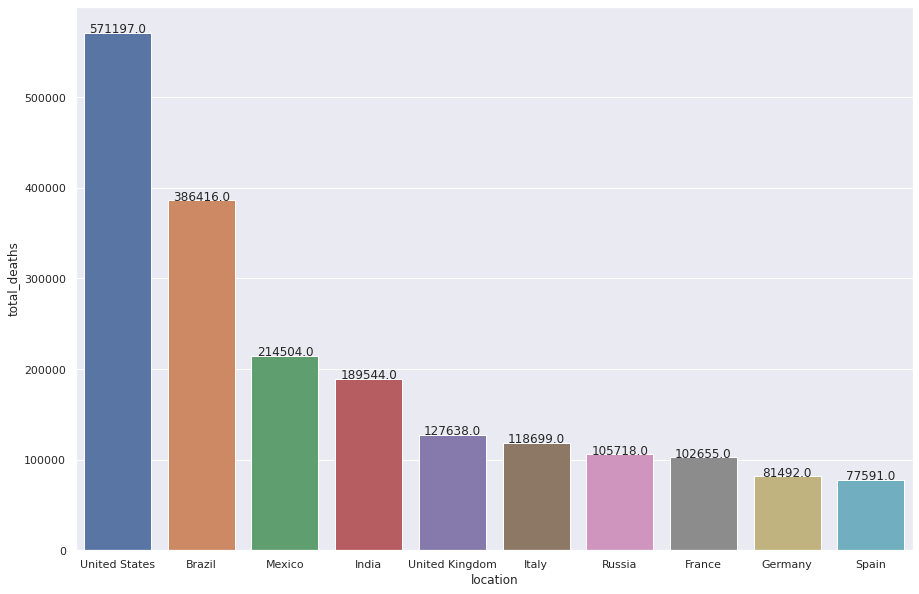

In [14]:
sns.set()
fg, ax = plt.subplots(figsize=(15,10))
g = sns.barplot(data=df_clean, x=top_deaths.location, y=top_deaths.total_deaths)
for p in g.patches:
    g.annotate(p.get_height(), (p.get_x()+p.get_width()/2.,p.get_height()), ha='center')
plt.show()

### Como o vírus está progredindo?

Uma das maiores preocupações das organizações de saúde é a progressão do número de casos e mortes no mundo.

Uma das melhores formas de visualizarmos a evolução ao longo do tempo, é o gráfico de linhas. Por isso, vamos plotar um gráfico de linha para demonstrar e evolução de mortes no mundo.

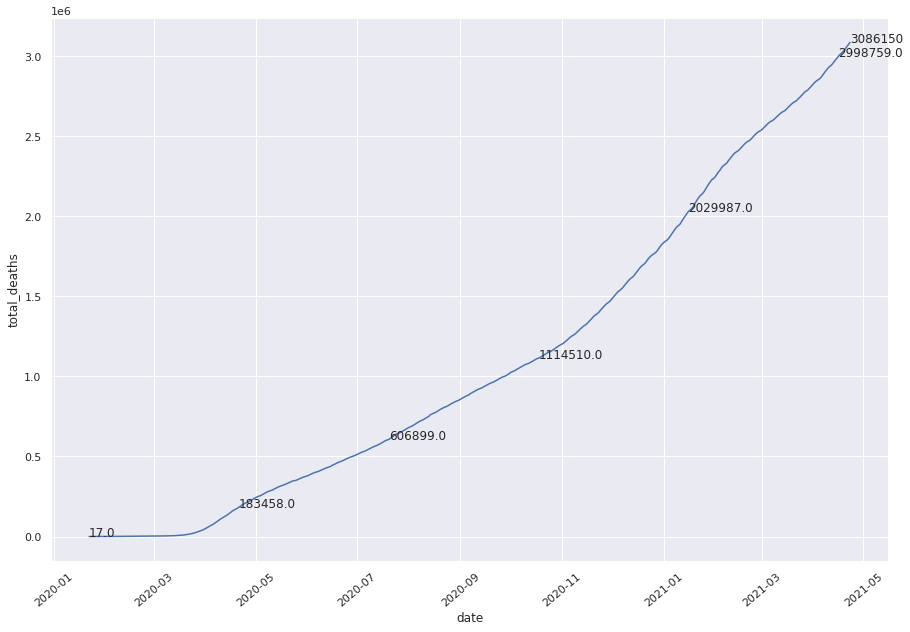

In [15]:
#@title *Código: Progressão de mortes no mundo*
fg, ax = plt.subplots(figsize=(15,10))
g = sns.lineplot(y='total_deaths', x='date', data=df[df.location == 'World'])
# df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot(figsize=(10,8));
plt.xticks(rotation=40)
for x,y in df[['date','total_deaths']][df.location == 'World'][::90].values:
        ax.text(x,y,y)
ax.text(df.date.max(),df['total_deaths'][df.location == 'World'].loc[df.date == df.date.max()],int(df['total_deaths'][df.location == 'World'].loc[df.date == df.date.max()]))
plt.show()

In [16]:
#@title *Código: Correlação entre variáveis não repetidas*
df_corr = df_clean.drop(['total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million',
                         'total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed_per_million',
                         'icu_patients_per_million','total_vaccinations_per_hundred','people_vaccinated_per_hundred',
                         'people_fully_vaccinated_per_hundred','new_vaccinations_smoothed_per_million',
                         'hosp_patients_per_million','weekly_icu_admissions_per_million',
                         'weekly_hosp_admissions_per_million','total_tests_per_thousand',
                         'new_tests_per_thousand','new_tests_smoothed_per_thousand','new_cases',
                         'new_deaths','aged_70_older','cardiovasc_death_rate','positive_rate'], axis=1).corr()
df_corr

,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,reproduction_rate,icu_patients,hosp_patients,weekly_icu_admissions,weekly_hosp_admissions,new_tests,total_tests,new_tests_smoothed,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,stringency_index,population,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
total_cases,1.000000,0.778843,0.943155,0.731721,-0.002021,0.798454,0.752735,0.617331,0.754176,0.804480,0.960582,0.832579,-0.034660,0.652191,0.799431,0.785123,0.617019,0.626225,0.071399,0.299961,-0.019695,0.106706,0.107010,0.100531,-0.083769,0.039318,0.080783,-0.063775,0.069346,0.000704,0.087634,0.119349
new_cases_smoothed,0.778843,1.000000,0.752893,0.829624,0.027705,0.956419,0.927972,0.720587,0.937721,0.826647,0.734859,0.838528,-0.040250,0.422069,0.570279,0.451265,0.474146,0.448349,0.098096,0.300429,-0.021508,0.121628,0.124945,0.107174,-0.090050,0.036350,0.097377,-0.062162,0.063369,0.011643,0.099037,0.131818
total_deaths,0.943155,0.752893,1.000000,0.801502,-0.004738,0.813943,0.785739,0.554938,0.757948,0.783293,0.884539,0.804500,-0.044355,0.600782,0.738807,0.729663,0.560094,0.570595,0.081916,0.274126,-0.030023,0.135828,0.137441,0.111251,-0.119928,0.049479,0.099355,-0.087224,0.129840,-0.006871,0.120475,0.153337
new_deaths_smoothed,0.731721,0.829624,0.801502,1.000000,0.000102,0.945426,0.947887,0.671168,0.894556,0.715695,0.651348,0.720439,-0.049434,0.311849,0.412401,0.332986,0.356385,0.361643,0.131722,0.256401,-0.029758,0.145623,0.147863,0.109556,-0.122883,0.034559,0.113270,-0.078755,0.131947,0.014838,0.120618,0.156519
reproduction_rate,-0.002021,0.027705,-0.004738,0.000102,1.000000,-0.080562,-0.086056,0.018257,-0.022940,-0.027510,-0.037782,-0.027495,-0.132085,-0.038638,0.042626,-0.005154,-0.018783,-0.015460,0.145686,0.048713,-0.007005,0.139879,0.143002,0.062297,-0.154912,-0.034887,0.110142,0.001318,0.122751,0.065081,0.136367,0.145790
icu_patients,0.798454,0.956419,0.813943,0.945426,-0.080562,1.000000,0.960301,0.826029,0.934312,0.856020,0.810443,0.880662,-0.117731,0.415013,0.436638,0.441912,0.604677,0.541813,0.194857,0.861372,-0.091796,-0.079786,-0.058811,0.085355,0.086807,0.339157,0.005279,-0.070983,NaN,-0.066745,-0.114921,0.060856
hosp_patients,0.752735,0.927972,0.785739,0.947887,-0.086056,0.960301,1.000000,0.758775,0.951975,0.805396,0.765274,0.835800,-0.137613,0.371770,0.395710,0.388681,0.542745,0.497356,0.249937,0.813100,-0.041489,-0.004780,0.026824,0.033090,0.379203,0.259240,0.002135,-0.079467,NaN,-0.088290,-0.011192,0.013961
weekly_icu_admissions,0.617331,0.720587,0.554938,0.671168,0.018257,0.826029,0.758775,1.000000,0.925420,0.606211,0.649591,0.774479,-0.193138,0.435739,0.497734,0.305702,0.320166,0.536052,0.245027,0.515258,-0.036481,0.042946,0.116769,-0.119703,0.221376,0.042539,0.310377,0.065868,NaN,0.337130,0.082248,-0.139521
weekly_hosp_admissions,0.754176,0.937721,0.757948,0.894556,-0.022940,0.934312,0.951975,0.925420,1.000000,0.748608,0.781594,0.845761,-0.113682,0.492566,0.507220,0.501765,0.733868,0.545059,0.154903,0.779345,-0.117871,-0.088197,-0.093500,0.134760,0.221742,0.310746,-0.056143,-0.118217,NaN,-0.083975,-0.186864,-0.000242
new_tests,0.804480,0.826647,0.783293,0.715695,-0.027510,0.856020,0.805396,0.606211,0.748608,1.000000,0.855893,0.969733,-0.025654,0.640341,0.680636,0.545173,0.696859,0.701954,0.068749,0.549227,-0.010666,0.100862,0.104144,0.129206,-0.059049,0.084122,0.085516,-0.037114,0.032838,-0.002815,0.069312,0.124839


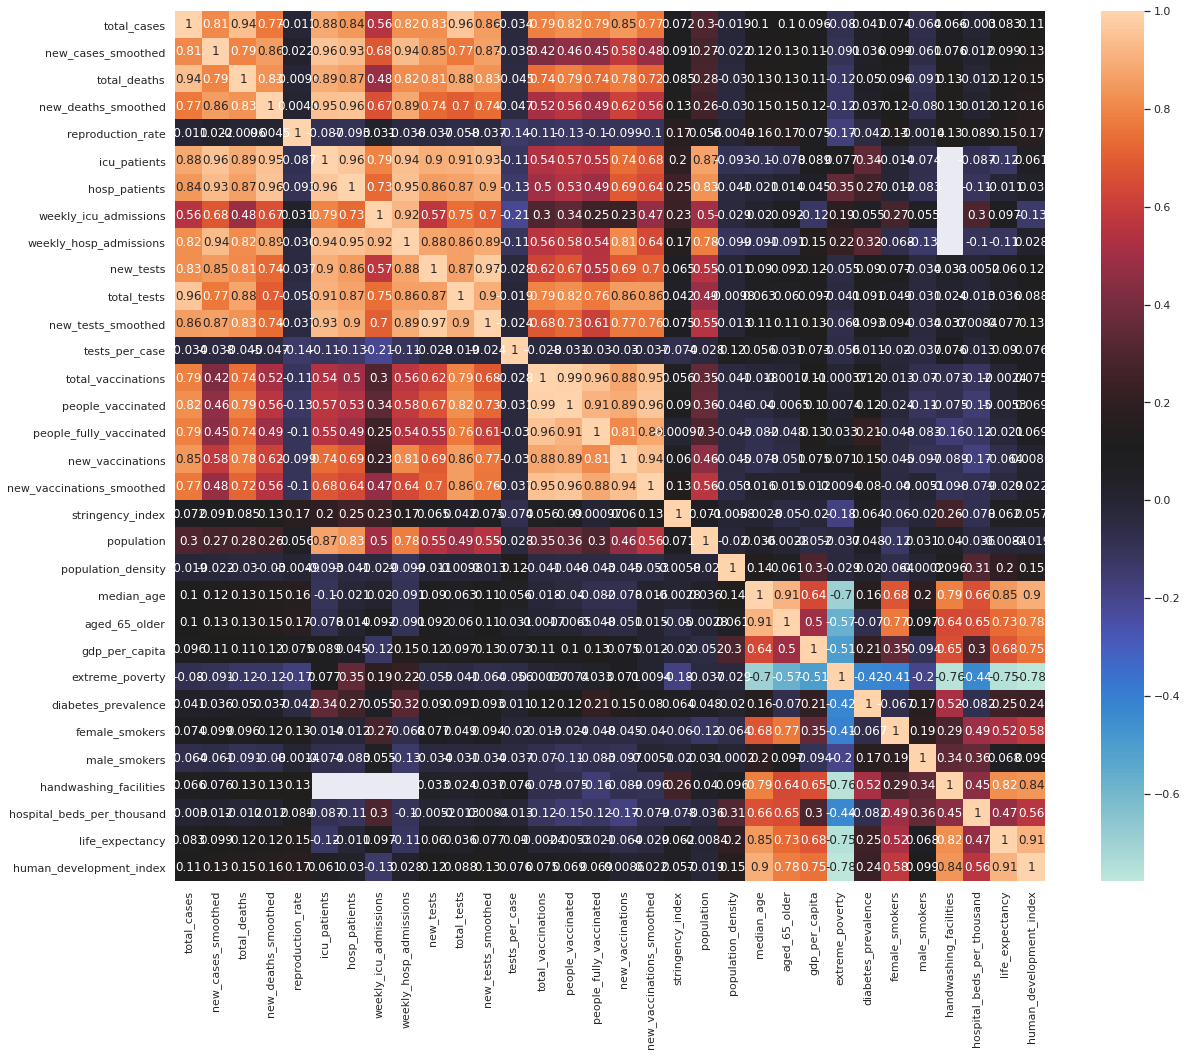

In [ ]:
fg, ax = plt.subplots(figsize=(20,16))
sns.heatmap(data=df_corr, annot=True, cmap='icefire', square=True)
plt.show()

Como existem muitos dados faltantes, as correlações acabam divergindo muito. Um dos principais pontos de análise que seria do resultado da vacina acaba se tornando ineficaz pois os dados começaram a surgir muito depois que o surto da doença já estava em níveis altos. Ao decorrer desta análise iremos filtrar alguns valores para que possamos verificar o verdadeiro impacto de algumas medidas de prevenção.

Para uma análise mais detalhada, vamos utilizar os 3 países com maior taxa de mortes por dia

In [17]:
# Países com mais mortes por dia
df_plot = df_clean.loc[(df.location == 'Brazil')|(df.location == 'United States')|(df.location == 'Russia')]

Podemos então analisar como está sendo a evolução das morte por dia dos países relatados acima para realizar uma comparação

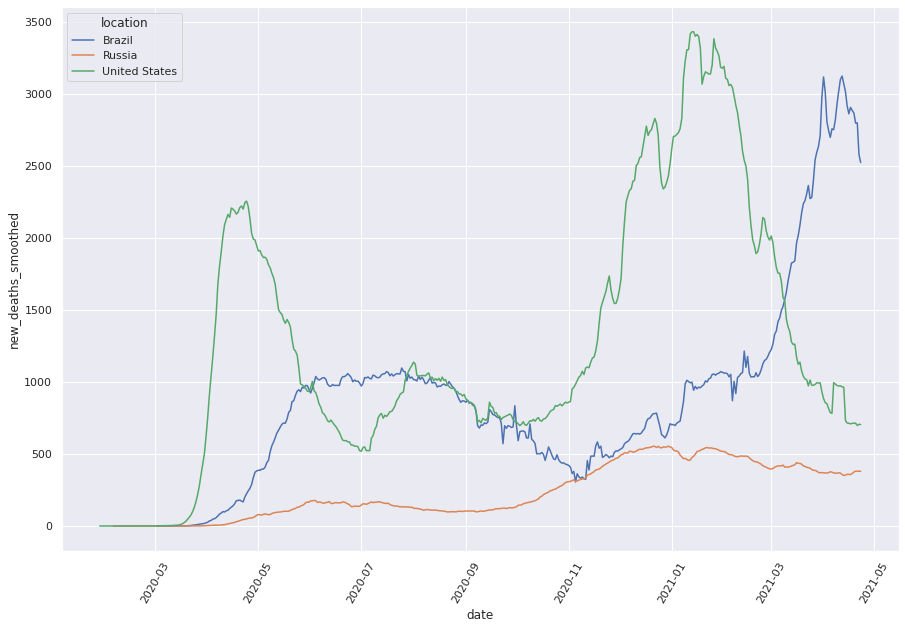

In [18]:
# Gráfico de correlação dos países com mais mortes por dia
fg, ax = plt.subplots(figsize=(15,10))
sns.lineplot(data=df_plot, y='new_deaths_smoothed', x='date', hue='location')
plt.xticks(rotation=60)
plt.show()

In [19]:
# Dia em que o Brasil ultrapassou os Estados Unidos em mortes diárias por COVID-19 em 2021
df_new_deaths = df_plot.pivot(index ='date', columns='location', values='new_deaths_smoothed')
df_new_deaths.loc[(df_new_deaths['Brazil']>=df_new_deaths['United States']) & (df_new_deaths.index.date > pd.to_datetime('01-01-2021'))].head(1)

location,Brazil,Russia,United States
date,,,
2021-03-09,1572.714,408.143,1565.857


Como podemos observar, pelos dados fornecidos, o Brasil ultrapassou o estados unidos em números de mortes por dia. Tornando-se o pais com maior quantidade de fatalidades diárias causadas pelo coronavírus.

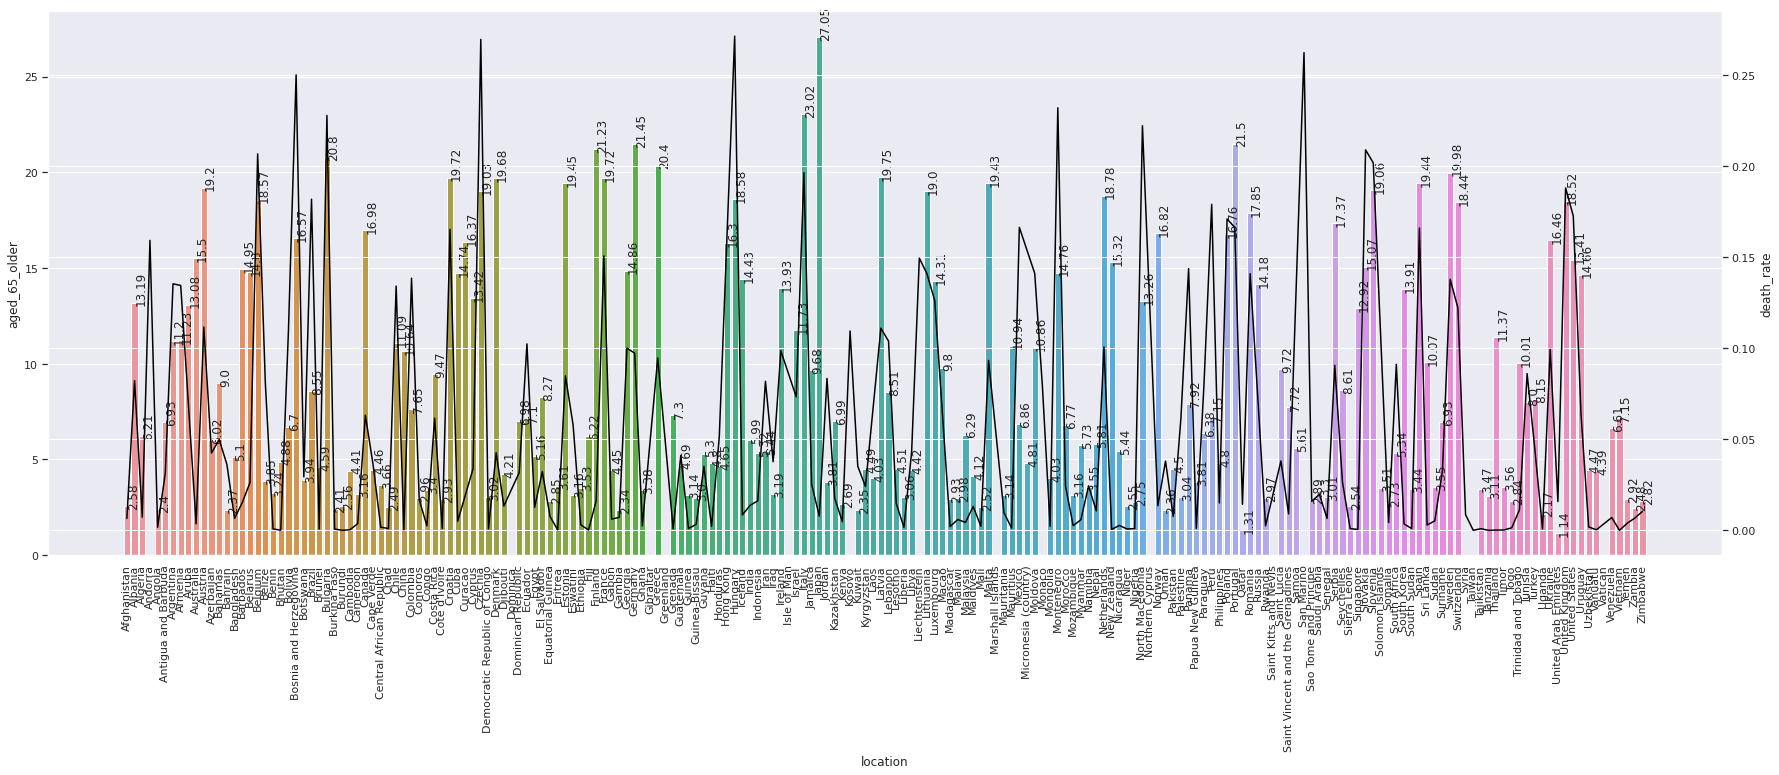

In [20]:
#@title *Código: Porcentagem de fatalidades por COVID-19 por porcentagem de acima de 65 anos*
df['death_rate'] = (df['total_deaths']/df['population'])*100
df['new_death_rate'] = (df['new_deaths_smoothed']/df['population'])*100
df_clean['death_rate'] = (df_clean['total_deaths']/df_clean['population'])*100
df_clean['new_death_rate'] = (df_clean['new_deaths_smoothed']/df_clean['population'])*100
fg, ax = plt.subplots(figsize=(30,10))
g = sns.barplot(x='location', y='aged_65_older', data=df_clean.drop(df_clean.loc[df_clean.date != df_clean.date.max()].index))
plt.xticks(rotation=90)
plt.twinx()
h = sns.lineplot(x='location', y='death_rate', data=df_clean.drop(df_clean.loc[df_clean.date != df_clean.date.max()].index), color='black')
for p in g.patches:
  g.annotate(p.get_height().round(2),(p.get_x()+p.get_width()/2.,p.get_height()), rotation=90)
plt.show()

Embora inúmeras matérias apontem a idade como fator decisivo, podemos ver a correlação direta da porcentagem de fatalidade em relação a população com a porcentagem da população acima de 65 anos. Em alguns casos a proporção é bem expressiva, mas em geral, pode-se dizer que existe sim uma leve correlação, mas não absoluta

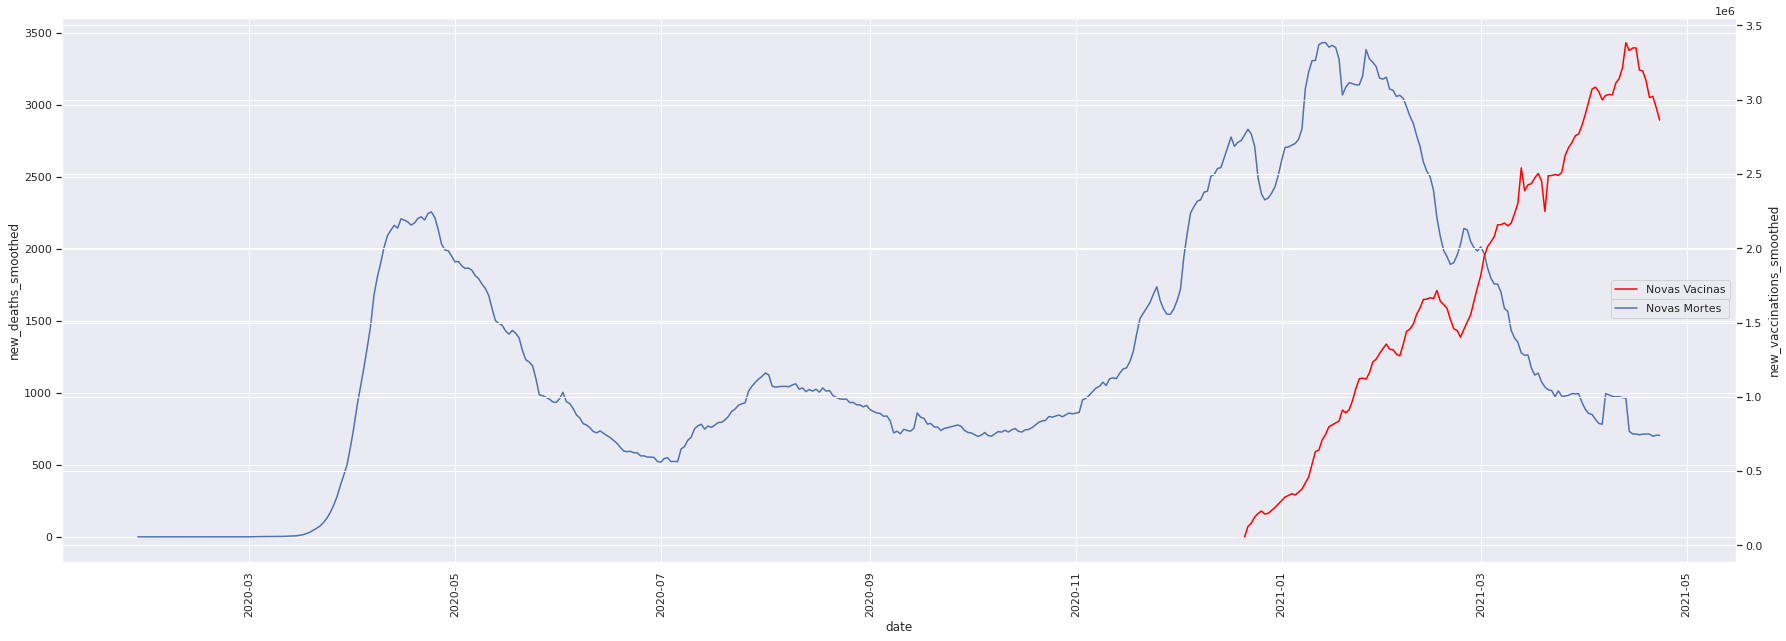

In [21]:
#@title *Código: Visualização do impacto da vacina nas mortes diárias*
fg, ax = plt.subplots(figsize=(30,10))
g1 = sns.lineplot(data=df_plot.loc[df.location == 'United States'], y='new_deaths_smoothed', x='date')
plt.xticks(rotation=90)
plt.twinx()
g2 = sns.lineplot(data=df_plot.loc[df.location == 'United States'], y='new_vaccinations_smoothed', x='date', color='red')
g1.legend(['Novas Mortes '],loc=(0.9255,0.448))
g2.legend(['Novas Vacinas'],loc='center right')
for p in g.patches:
  g.annotate(p.get_height().round(2),(p.get_x()+p.get_width()/2.,p.get_height()), rotation=90)
plt.show()

Pode-se reparar que depois da distribuição da vacina, a correlação entre as novas doses aplicadas e as novas mortes pelo vírus são praticamente inversamente proporcionais.

Com isso podemos reparar um novo gráfico de correlação entre as variáveis, agora analisando apenas os dados já com as vacinas em circulação:

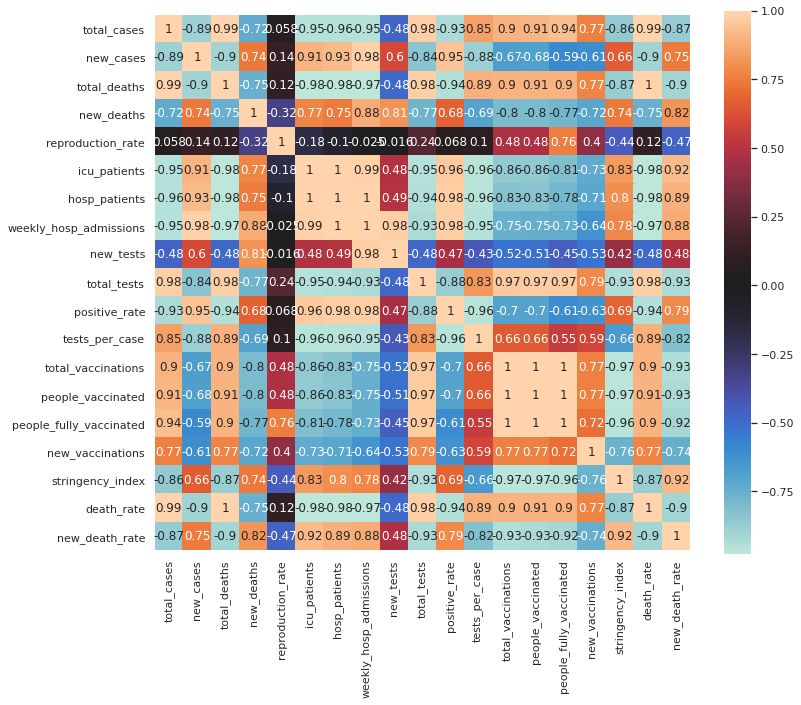

In [22]:
#@title *Código: Correlação após a chegada da vacina*
fg, ax = plt.subplots(figsize=(12,10))
sns.heatmap(data=df_clean.loc[df_clean.location == 'United States'].drop(['weekly_icu_admissions','weekly_icu_admissions_per_million',
                                                                          'population','population_density','median_age','aged_65_older',
                                                                          'aged_70_older','extreme_poverty','gdp_per_capita',
                                                                          'cardiovasc_death_rate','diabetes_prevalence','female_smokers',
                                                                          'male_smokers','handwashing_facilities','hospital_beds_per_thousand',
                                                                          'life_expectancy','human_development_index','new_cases_smoothed',
                                                                          'total_cases_per_million','new_cases_per_million',
                                                                          'new_cases_smoothed_per_million','total_deaths_per_million',
                                                                          'new_deaths_per_million','new_deaths_smoothed_per_million',
                                                                          'hosp_patients_per_million','weekly_hosp_admissions_per_million',
                                                                          'total_tests_per_thousand','new_tests_per_thousand',
                                                                          'new_tests_smoothed','new_tests_smoothed_per_thousand',
                                                                          'new_vaccinations_smoothed','total_vaccinations_per_hundred',
                                                                          'people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred',
                                                                          'new_vaccinations_smoothed_per_million', 'icu_patients_per_million',
                                                                          'new_deaths_smoothed'], axis=1)[df_clean.date.dt.year >=2021].corr(), annot=True, cmap='icefire', square=True)
plt.show()

Dividindo o gráfico em duas partes (antes e depois da chegada das vacinas), podemos perceber que as relações mudam drasticamente. O impacto dos medicamentos foi tão severo que devemos olhar os dados separadamente para ter uma análise melhor das informações obtidas.

### Análise Exploratória para o Brasil

Agora que já temos uma noção dos acontecimentos no mundo, vamos focar nos acontecimentos no Brasil.

In [23]:
df_Brasil = df.loc[df.location == 'Brazil'].copy()
df_Brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,death_rate,new_death_rate
10725,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN
10726,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN
10727,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN
10728,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN
10729,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN


Acima, verificamos que nosso dataset inclui datas desde **31-12-2019** até **Data Atual**.

Vamos verificar quando foram identificados o primeiro caso e a primeira morte no Brasil.

In [24]:
# primeiro caso
df_Brasil.drop(df_Brasil[df_Brasil.new_cases.isnull()].index).loc[df_Brasil['new_cases'] != 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,death_rate,new_death_rate
10725,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN


In [26]:
# Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
# identificaçãso do primeiro caso
df_Brasil.loc[df_Brasil['new_cases'] != 0.0].head(1)
print('O primeiro caso foi registrado em {}'.format(df_Brasil.date.loc[10725]))

O primeiro caso foi registrado em 2020-02-26 00:00:00


In [27]:
# primeira morte
df_Brasil.drop(df_Brasil[df_Brasil.new_deaths.isnull()].index).loc[df_Brasil['new_deaths'] != 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,death_rate,new_death_rate
10745,BRA,South America,Brazil,2020-03-17,321.0,121.0,41.429,1.0,1.0,0.143,1.51,0.569,0.195,0.005,0.005,0.001,2.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.87,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,4.704567e-07,6.727531e-08


In [28]:
# primeira morte
df_Brasil.loc[df_Brasil['new_deaths'] != 0.0].head(1)
print('A primeira morte foi registrada em {}'.format(df_Brasil.date.loc[10745]))

A primeira morte foi registrada em 2020-03-17 00:00:00


Uma informação interessante para investigarmos é quanto tempo levou desde o primeiro caso até a primeira morte.

In [31]:
# Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
# calculando tempo desde o primeiro caso até a primeira morte
from datetime import date
delta = df_Brasil.date.loc[10745] - df_Brasil.date.loc[10725]
print('Se passaram {} dias entre o primeiro caso e a primeira morte no Brasil.'.format(delta.days))

Se passaram 20 dias entre o primeiro caso e a primeira morte no Brasil.


Por fim, vamos plotar gráficos de linha para compararmos a evolução dos casos e mortes no Brasil.

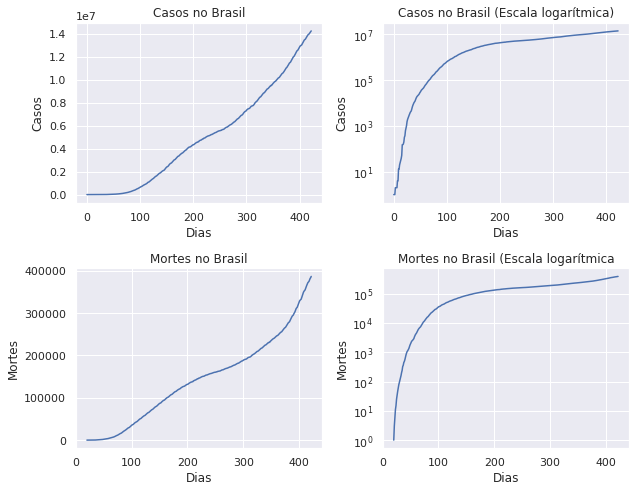

In [33]:
#@title *Código: Plotagem dos dados de COVID-19 no Brasil*]
# Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.
x = list(range(423))
z = df_Brasil['total_cases']
z2 = df_Brasil['total_deaths']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(9, 7))
ax1.set_title('Casos no Brasil')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.plot(x, z)

ax2.set_title('Casos no Brasil (Escala logarítmica)')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Casos')
ax2.set_yscale('log')
ax2.plot(x, z)

ax3.set_title('Mortes no Brasil')
ax3.set_xlabel('Dias')
ax3.set_ylabel('Mortes')
ax3.plot(x, z2)

ax4.set_title('Mortes no Brasil (Escala logarítmica')
ax4.set_xlabel('Dias')
ax4.set_ylabel('Mortes')
ax4.set_yscale('log')
ax4.plot(x, z2)
plt.tight_layout()

## Conclusão

As medidas de prevenção são necessárias e se mostram sim eficazes na prevenção do COVID-19. Ao longo dos gráficos podemos perceber claramente as ondas de contaminação que impactam diretamente na quantidade de fatalidades diárias causadas por complicação do vírus.

A chegada da vacina foi tão expressiva e importante que alterou completamente a dinâmica das relações dos dados fornecidos. Isolando os valores pudemos sim perceber que após a onda de vacinação a situação se tornou favorável.

No geral, não há uma variável específica responsável pelas complicações em cada país, mas sim um conjunto denso dessas variáveis, como:
* Restrição do governo
* Acesso a higienização
* Leitos em hospital
* Unidades de atendimento

Algumas dessas variáveis são levementa mais expressivas que outras na evolução da contenção do novo coronavírus, porém todas em certo grau de importância.

É importante estar ciente dos resultados gerais e ter a ciência de que as medidas têm sim impacto positivo no tratamento como observa-se nos dados.

A tendência no **Brasil** é de que já na primeira etapa de vacinação, que tem uma relação também forte com a queda dos casos de morte por COVID-19 como observado, já resulte em uma melhora direta e em uma queda nos valores do gráfico de fatalidades diárias. As demais variáveis referentes às etapas de vacinação também mostram relação inversa notável, como:
* Novas pessoas vacinadas
* Pessoas completamente vacinadas
* Total de vacinas

Com isso, podemos concluir que ao decorrer das etapas de vacinação, a decadência das curva de mortes tende a ocorrer na mesma proporção do avanço medicinal da contenção do vírus.